## Base de dados games
O dataset se encontra aqui: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
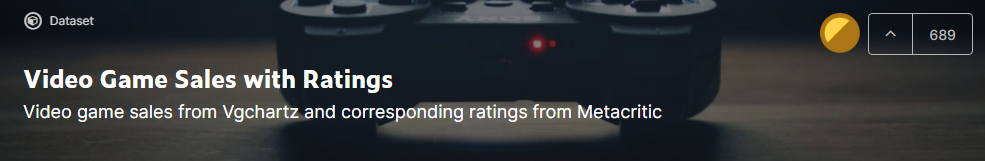

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Explorando os dados fornecidos

Exploração dos dados fornecidos com a função ``info()``:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis:

In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


#### Transformação 01 - Apagando colunas irrelevantes

In [6]:
df = df.drop('Other_Sales', axis = 1)
df = df.drop('Global_Sales', axis = 1)
df = df.drop('Developer', axis = 1)

#### Transformação 02 - Tratando valores inconsistentes

In [7]:
df.shape

(16719, 13)

In [8]:
print("Valores nulos antes da transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes da transformação: 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Rating             6769
dtype: int64



In [9]:
df = df.dropna(axis = 0)

In [10]:
print("Valores nulos após a transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos após a transformação: 

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64



In [11]:
df.shape

(6825, 13)

Observamos que não há mais colunas inconsistentes no nosso DataFrame, Porém diminuimos drasticamente a nossa base de dados, é notável que é um valor bastante considerável de perda de dados, porém já que é apenas para fins de testes decidi realizar esta maneira.

#### Transformação 03 - Outras transformações
Tivemos que apagar alguns dados das colunas 'NA_Sales' e 'EU_Sales' pois estavam dando problema na rede neural, porém perdemos dados consideráveis.

In [12]:
a = df.loc[df['NA_Sales'] < 1]
a.shape

(6233, 13)

In [13]:
df = df.loc[df['NA_Sales'] > 1]

In [14]:
df = df.loc[df['EU_Sales'] > 1]

In [15]:
df.shape

(258, 13)

In [16]:
# Dados repetidos
df['Name'].value_counts()

Grand Theft Auto V                        4
Battlefield 4                             3
The Elder Scrolls V: Skyrim               3
Call of Duty: Ghosts                      3
Assassin's Creed IV: Black Flag           3
                                         ..
Halo 5: Guardians                         1
Cooking Mama 2: Dinner With Friends       1
The Legend of Zelda: Phantom Hourglass    1
Killzone 2                                1
Resident Evil 2                           1
Name: Name, Length: 223, dtype: int64

In [17]:
name_games = df['Name']

In [18]:
# Apagando a coluna 'Name'
df = df.drop('Name', axis = 1)

#### Definindo as features do modelo

In [19]:
X = df.iloc[:, [0, 1, 2, 3, 7, 8, 9, 10, 11]].values
y_na = df.iloc[:, 4].values
y_eu = df.iloc[:, 5].values
y_jp = df.iloc[:, 6].values

#### Transformação 04 - Label Enconder & One Hot Enconder
Como a maioria dos algoritmos de aprendizado estatístico supervisionado só aceita valores numéricos como entrada, é necessário então o pré-processamento das variáveis do tipo "object" antes de usar esse dataset como entrada para o treinamento de um modelo.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
le = LabelEncoder()

In [22]:
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 8] = le.fit_transform(X[:, 8])

In [23]:
ohe = OneHotEncoder(categorical_features = [0, 2, 3, 8])

In [24]:
X = ohe.fit_transform(X).toarray()

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


###### Importações
Para isso, utilizaremos a biblioteca ``keras``

In [25]:
from keras.layers import Dense, Dropout, Activation, Input
from keras.models import Model

#### Redes Neurais com múltiplas saídas

###### Parâmetros da rede neural artificial:
Link: https://keras.io/

    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios que fazem parte da camada oculta
    activation - Função de ativação que será inserida
   
Ponto de partida para o paramêtro ``units`` - número de entradas(61) +  número de saidas(3) / 2 = 32

In [26]:
# Camada inicial
camada_entrada = Input(shape=(61,))
# Camadas ocultas
camada_oculta1 = Dense(units = 32, activation = 'sigmoid')(camada_entrada) #  < vinculação (ligação de camadas)
camada_oculta2 = Dense(units = 32, activation = 'sigmoid')(camada_oculta1)
# Camadas de saida
camada_saida1 = Dense(units = 1, activation = 'linear')(camada_oculta2)
camada_saida2 = Dense(units = 1, activation = 'linear')(camada_oculta2)
camada_saida3 = Dense(units = 1, activation = 'linear')(camada_oculta2)

###### Parâmetros do otimizador

    optimizer - descida do gradiente e descida do gradiente estocástica (adam é uma otimização do estocástica)
    loss - Função de perda (binary_crossentropy pois só há uma saída)

In [27]:
regressor = Model(inputs = camada_entrada,
                 outputs = [camada_saida1, camada_saida2, camada_saida3])
# Compilação
regressor.compile(optimizer = 'adam', loss = 'mse')

In [28]:
regressor.fit(X, [y_na, y_eu, y_jp], epochs = 5000, batch_size = 100)

Epoch 1/5000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 0s 2ms/step - loss: 31.0423 - dense_2_loss: 16.1548 - dense_3_loss: 12.2645 - dense_4_loss: 2.6230
Epoch 2/5000
3/3 [==============================] - 0s 2ms/step - loss: 29.9176 - dense_2_loss: 15.6943 - dense_3_loss: 11.7246 - dense_4_loss: 2.4987
Epoch 3/5000
3/3 [==============================] - 0s 2ms/step - loss: 28.8

3/3 [==============================] - 0s 3ms/step - loss: 18.8939 - dense_2_loss: 11.9018 - dense_3_loss: 5.8485 - dense_4_loss: 1.1436
Epoch 50/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8949 - dense_2_loss: 11.9037 - dense_3_loss: 5.8479 - dense_4_loss: 1.1432
Epoch 51/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8882 - dense_2_loss: 11.8978 - dense_3_loss: 5.8476 - dense_4_loss: 1.1428
Epoch 52/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8893 - dense_2_loss: 11.8994 - dense_3_loss: 5.8476 - dense_4_loss: 1.1423
Epoch 53/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8874 - dense_2_loss: 11.8973 - dense_3_loss: 5.8478 - dense_4_loss: 1.1423
Epoch 54/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8878 - dense_2_loss: 11.8998 - dense_3_loss: 5.8464 - dense_4_loss: 1.1416
Epoch 55/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8850 - dense_2_loss: 11.8976 - d

3/3 [==============================] - 0s 3ms/step - loss: 18.8585 - dense_2_loss: 11.8851 - dense_3_loss: 5.8347 - dense_4_loss: 1.1387
Epoch 104/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8531 - dense_2_loss: 11.8803 - dense_3_loss: 5.8341 - dense_4_loss: 1.1387
Epoch 105/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8537 - dense_2_loss: 11.8813 - dense_3_loss: 5.8336 - dense_4_loss: 1.1388
Epoch 106/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8528 - dense_2_loss: 11.8807 - dense_3_loss: 5.8332 - dense_4_loss: 1.1389
Epoch 107/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8566 - dense_2_loss: 11.8841 - dense_3_loss: 5.8337 - dense_4_loss: 1.1387
Epoch 108/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8554 - dense_2_loss: 11.8834 - dense_3_loss: 5.8333 - dense_4_loss: 1.1387
Epoch 109/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8568 - dense_2_loss: 11.88

Epoch 157/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8381 - dense_2_loss: 11.8751 - dense_3_loss: 5.8245 - dense_4_loss: 1.1384
Epoch 158/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8384 - dense_2_loss: 11.8764 - dense_3_loss: 5.8237 - dense_4_loss: 1.1383
Epoch 159/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8372 - dense_2_loss: 11.8750 - dense_3_loss: 5.8241 - dense_4_loss: 1.1381
Epoch 160/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8359 - dense_2_loss: 11.8740 - dense_3_loss: 5.8238 - dense_4_loss: 1.1380
Epoch 161/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8352 - dense_2_loss: 11.8735 - dense_3_loss: 5.8237 - dense_4_loss: 1.1380
Epoch 162/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8359 - dense_2_loss: 11.8744 - dense_3_loss: 5.8236 - dense_4_loss: 1.1379
Epoch 163/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8373 - dens

3/3 [==============================] - 0s 4ms/step - loss: 18.8221 - dense_2_loss: 11.8679 - dense_3_loss: 5.8163 - dense_4_loss: 1.1378
Epoch 211/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8201 - dense_2_loss: 11.8660 - dense_3_loss: 5.8161 - dense_4_loss: 1.1379
Epoch 212/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8230 - dense_2_loss: 11.8684 - dense_3_loss: 5.8166 - dense_4_loss: 1.1379
Epoch 213/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8184 - dense_2_loss: 11.8647 - dense_3_loss: 5.8160 - dense_4_loss: 1.1377
Epoch 214/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8174 - dense_2_loss: 11.8642 - dense_3_loss: 5.8159 - dense_4_loss: 1.1374
Epoch 215/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8212 - dense_2_loss: 11.8672 - dense_3_loss: 5.8160 - dense_4_loss: 1.1379
Epoch 216/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8247 - dense_2_loss: 11.86

Epoch 264/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8072 - dense_2_loss: 11.8592 - dense_3_loss: 5.8108 - dense_4_loss: 1.1372
Epoch 265/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8080 - dense_2_loss: 11.8597 - dense_3_loss: 5.8109 - dense_4_loss: 1.1374
Epoch 266/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8054 - dense_2_loss: 11.8583 - dense_3_loss: 5.8105 - dense_4_loss: 1.1365
Epoch 267/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8049 - dense_2_loss: 11.8588 - dense_3_loss: 5.8098 - dense_4_loss: 1.1364
Epoch 268/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8028 - dense_2_loss: 11.8569 - dense_3_loss: 5.8094 - dense_4_loss: 1.1366
Epoch 269/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8039 - dense_2_loss: 11.8565 - dense_3_loss: 5.8103 - dense_4_loss: 1.1371
Epoch 270/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.8070 - dens

3/3 [==============================] - 0s 2ms/step - loss: 18.7987 - dense_2_loss: 11.8394 - dense_3_loss: 5.8212 - dense_4_loss: 1.1382
Epoch 318/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.8008 - dense_2_loss: 11.8425 - dense_3_loss: 5.8213 - dense_4_loss: 1.1371
Epoch 319/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7968 - dense_2_loss: 11.8396 - dense_3_loss: 5.8200 - dense_4_loss: 1.1372
Epoch 320/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7939 - dense_2_loss: 11.8365 - dense_3_loss: 5.8205 - dense_4_loss: 1.1369
Epoch 321/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7944 - dense_2_loss: 11.8371 - dense_3_loss: 5.8205 - dense_4_loss: 1.1368
Epoch 322/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7943 - dense_2_loss: 11.8366 - dense_3_loss: 5.8208 - dense_4_loss: 1.1369
Epoch 323/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7921 - dense_2_loss: 11.83

Epoch 371/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7709 - dense_2_loss: 11.8200 - dense_3_loss: 5.8145 - dense_4_loss: 1.1364
Epoch 372/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7712 - dense_2_loss: 11.8201 - dense_3_loss: 5.8146 - dense_4_loss: 1.1365
Epoch 373/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7720 - dense_2_loss: 11.8214 - dense_3_loss: 5.8139 - dense_4_loss: 1.1366
Epoch 374/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7679 - dense_2_loss: 11.8179 - dense_3_loss: 5.8138 - dense_4_loss: 1.1362
Epoch 375/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7696 - dense_2_loss: 11.8193 - dense_3_loss: 5.8143 - dense_4_loss: 1.1359
Epoch 376/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7696 - dense_2_loss: 11.8194 - dense_3_loss: 5.8140 - dense_4_loss: 1.1362
Epoch 377/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7706 - dens

3/3 [==============================] - 0s 2ms/step - loss: 18.7461 - dense_2_loss: 11.8037 - dense_3_loss: 5.8119 - dense_4_loss: 1.1304
Epoch 425/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7484 - dense_2_loss: 11.8057 - dense_3_loss: 5.8126 - dense_4_loss: 1.1301
Epoch 426/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7453 - dense_2_loss: 11.8046 - dense_3_loss: 5.8112 - dense_4_loss: 1.1295
Epoch 427/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7450 - dense_2_loss: 11.8054 - dense_3_loss: 5.8104 - dense_4_loss: 1.1292
Epoch 428/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7433 - dense_2_loss: 11.8035 - dense_3_loss: 5.8105 - dense_4_loss: 1.1293
Epoch 429/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7444 - dense_2_loss: 11.8041 - dense_3_loss: 5.8106 - dense_4_loss: 1.1297
Epoch 430/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7433 - dense_2_loss: 11.80

Epoch 478/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7396 - dense_2_loss: 11.7906 - dense_3_loss: 5.8168 - dense_4_loss: 1.1322
Epoch 479/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7376 - dense_2_loss: 11.7908 - dense_3_loss: 5.8157 - dense_4_loss: 1.1311
Epoch 480/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7374 - dense_2_loss: 11.7905 - dense_3_loss: 5.8156 - dense_4_loss: 1.1313
Epoch 481/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7374 - dense_2_loss: 11.7896 - dense_3_loss: 5.8167 - dense_4_loss: 1.1311
Epoch 482/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7394 - dense_2_loss: 11.7911 - dense_3_loss: 5.8168 - dense_4_loss: 1.1314
Epoch 483/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7366 - dense_2_loss: 11.7891 - dense_3_loss: 5.8165 - dense_4_loss: 1.1310
Epoch 484/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7358 - dens

3/3 [==============================] - 0s 2ms/step - loss: 18.7073 - dense_2_loss: 11.7734 - dense_3_loss: 5.8075 - dense_4_loss: 1.1264
Epoch 532/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.7152 - dense_2_loss: 11.7799 - dense_3_loss: 5.8082 - dense_4_loss: 1.1272
Epoch 533/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7007 - dense_2_loss: 11.7690 - dense_3_loss: 5.8056 - dense_4_loss: 1.1260
Epoch 534/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7050 - dense_2_loss: 11.7735 - dense_3_loss: 5.8055 - dense_4_loss: 1.1259
Epoch 535/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7048 - dense_2_loss: 11.7717 - dense_3_loss: 5.8070 - dense_4_loss: 1.1261
Epoch 536/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7015 - dense_2_loss: 11.7698 - dense_3_loss: 5.8053 - dense_4_loss: 1.1265
Epoch 537/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7004 - dense_2_loss: 11.76

Epoch 585/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6866 - dense_2_loss: 11.7633 - dense_3_loss: 5.8013 - dense_4_loss: 1.1219
Epoch 586/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6862 - dense_2_loss: 11.7646 - dense_3_loss: 5.8007 - dense_4_loss: 1.1209
Epoch 587/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6859 - dense_2_loss: 11.7638 - dense_3_loss: 5.8012 - dense_4_loss: 1.1209
Epoch 588/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6901 - dense_2_loss: 11.7664 - dense_3_loss: 5.8023 - dense_4_loss: 1.1214
Epoch 589/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6860 - dense_2_loss: 11.7638 - dense_3_loss: 5.8011 - dense_4_loss: 1.1211
Epoch 590/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6833 - dense_2_loss: 11.7613 - dense_3_loss: 5.8009 - dense_4_loss: 1.1211
Epoch 591/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6854 - dens

3/3 [==============================] - 0s 2ms/step - loss: 18.6561 - dense_2_loss: 11.7440 - dense_3_loss: 5.7947 - dense_4_loss: 1.1174
Epoch 639/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6578 - dense_2_loss: 11.7454 - dense_3_loss: 5.7953 - dense_4_loss: 1.1171
Epoch 640/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6511 - dense_2_loss: 11.7399 - dense_3_loss: 5.7941 - dense_4_loss: 1.1172
Epoch 641/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6492 - dense_2_loss: 11.7385 - dense_3_loss: 5.7935 - dense_4_loss: 1.1171
Epoch 642/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6481 - dense_2_loss: 11.7377 - dense_3_loss: 5.7932 - dense_4_loss: 1.1172
Epoch 643/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6522 - dense_2_loss: 11.7415 - dense_3_loss: 5.7932 - dense_4_loss: 1.1175
Epoch 644/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6507 - dense_2_loss: 11.73

Epoch 692/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6479 - dense_2_loss: 11.7418 - dense_3_loss: 5.7919 - dense_4_loss: 1.1142
Epoch 693/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6359 - dense_2_loss: 11.7312 - dense_3_loss: 5.7903 - dense_4_loss: 1.1144
Epoch 694/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6344 - dense_2_loss: 11.7305 - dense_3_loss: 5.7896 - dense_4_loss: 1.1143
Epoch 695/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6319 - dense_2_loss: 11.7284 - dense_3_loss: 5.7892 - dense_4_loss: 1.1144
Epoch 696/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6328 - dense_2_loss: 11.7304 - dense_3_loss: 5.7884 - dense_4_loss: 1.1140
Epoch 697/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6351 - dense_2_loss: 11.7310 - dense_3_loss: 5.7898 - dense_4_loss: 1.1144
Epoch 698/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6406 - dens

3/3 [==============================] - 0s 3ms/step - loss: 18.6136 - dense_2_loss: 11.7168 - dense_3_loss: 5.7851 - dense_4_loss: 1.1116
Epoch 746/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6095 - dense_2_loss: 11.7143 - dense_3_loss: 5.7839 - dense_4_loss: 1.1113
Epoch 747/5000
3/3 [==============================] - 0s 4ms/step - loss: 18.6064 - dense_2_loss: 11.7125 - dense_3_loss: 5.7829 - dense_4_loss: 1.1111
Epoch 748/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6066 - dense_2_loss: 11.7123 - dense_3_loss: 5.7840 - dense_4_loss: 1.1103
Epoch 749/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6094 - dense_2_loss: 11.7143 - dense_3_loss: 5.7845 - dense_4_loss: 1.1106
Epoch 750/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.6087 - dense_2_loss: 11.7148 - dense_3_loss: 5.7834 - dense_4_loss: 1.1104
Epoch 751/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.6055 - dense_2_loss: 11.71

Epoch 799/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4411 - dense_2_loss: 11.5868 - dense_3_loss: 5.7504 - dense_4_loss: 1.1038
Epoch 800/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.4498 - dense_2_loss: 11.5923 - dense_3_loss: 5.7530 - dense_4_loss: 1.1045
Epoch 801/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4342 - dense_2_loss: 11.5799 - dense_3_loss: 5.7505 - dense_4_loss: 1.1038
Epoch 802/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4312 - dense_2_loss: 11.5798 - dense_3_loss: 5.7486 - dense_4_loss: 1.1029
Epoch 803/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.4231 - dense_2_loss: 11.5758 - dense_3_loss: 5.7452 - dense_4_loss: 1.1021
Epoch 804/5000
3/3 [==============================] - 0s 4ms/step - loss: 18.4255 - dense_2_loss: 11.5771 - dense_3_loss: 5.7450 - dense_4_loss: 1.1033
Epoch 805/5000
3/3 [==============================] - 0s 4ms/step - loss: 18.4319 - dens

3/3 [==============================] - 0s 2ms/step - loss: 18.3105 - dense_2_loss: 11.5024 - dense_3_loss: 5.6964 - dense_4_loss: 1.1116
Epoch 853/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3072 - dense_2_loss: 11.4975 - dense_3_loss: 5.7020 - dense_4_loss: 1.1077
Epoch 854/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3012 - dense_2_loss: 11.4963 - dense_3_loss: 5.7005 - dense_4_loss: 1.1044
Epoch 855/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3000 - dense_2_loss: 11.4926 - dense_3_loss: 5.6989 - dense_4_loss: 1.1085
Epoch 856/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2944 - dense_2_loss: 11.4910 - dense_3_loss: 5.6965 - dense_4_loss: 1.1069
Epoch 857/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2843 - dense_2_loss: 11.4856 - dense_3_loss: 5.6940 - dense_4_loss: 1.1047
Epoch 858/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2970 - dense_2_loss: 11.49

3/3 [==============================] - 0s 0s/step - loss: 18.1401 - dense_2_loss: 11.3870 - dense_3_loss: 5.6612 - dense_4_loss: 1.0919
Epoch 907/5000
3/3 [==============================] - 0s 0s/step - loss: 18.1662 - dense_2_loss: 11.3994 - dense_3_loss: 5.6703 - dense_4_loss: 1.0964
Epoch 908/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.1702 - dense_2_loss: 11.4007 - dense_3_loss: 5.6727 - dense_4_loss: 1.0968
Epoch 909/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.1569 - dense_2_loss: 11.3995 - dense_3_loss: 5.6647 - dense_4_loss: 1.0927
Epoch 910/5000
3/3 [==============================] - 0s 3ms/step - loss: 18.1502 - dense_2_loss: 11.3966 - dense_3_loss: 5.6616 - dense_4_loss: 1.0920
Epoch 911/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.1459 - dense_2_loss: 11.4042 - dense_3_loss: 5.6565 - dense_4_loss: 1.0852
Epoch 912/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.1351 - dense_2_loss: 11.3923

3/3 [==============================] - 0s 2ms/step - loss: 17.9870 - dense_2_loss: 11.3066 - dense_3_loss: 5.6112 - dense_4_loss: 1.0692
Epoch 961/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.9652 - dense_2_loss: 11.2892 - dense_3_loss: 5.6098 - dense_4_loss: 1.0662
Epoch 962/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.9768 - dense_2_loss: 11.3007 - dense_3_loss: 5.6092 - dense_4_loss: 1.0669
Epoch 963/5000
3/3 [==============================] - 0s 3ms/step - loss: 17.9939 - dense_2_loss: 11.3167 - dense_3_loss: 5.6114 - dense_4_loss: 1.0658
Epoch 964/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.9691 - dense_2_loss: 11.2953 - dense_3_loss: 5.6089 - dense_4_loss: 1.0650
Epoch 965/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.9648 - dense_2_loss: 11.2889 - dense_3_loss: 5.6111 - dense_4_loss: 1.0648
Epoch 966/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.9579 - dense_2_loss: 11.28

3/3 [==============================] - 0s 2ms/step - loss: 17.8531 - dense_2_loss: 11.2295 - dense_3_loss: 5.5724 - dense_4_loss: 1.0511
Epoch 1014/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.8492 - dense_2_loss: 11.2287 - dense_3_loss: 5.5703 - dense_4_loss: 1.0502
Epoch 1015/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.8355 - dense_2_loss: 11.2258 - dense_3_loss: 5.5599 - dense_4_loss: 1.0498
Epoch 1016/5000
3/3 [==============================] - 0s 1ms/step - loss: 17.8622 - dense_2_loss: 11.2474 - dense_3_loss: 5.5635 - dense_4_loss: 1.0513
Epoch 1017/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.8278 - dense_2_loss: 11.2169 - dense_3_loss: 5.5590 - dense_4_loss: 1.0520
Epoch 1018/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.8398 - dense_2_loss: 11.2284 - dense_3_loss: 5.5592 - dense_4_loss: 1.0522
Epoch 1019/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.8386 - dense_2_loss:

3/3 [==============================] - 0s 0s/step - loss: 17.8111 - dense_2_loss: 11.2179 - dense_3_loss: 5.5441 - dense_4_loss: 1.0491
Epoch 1067/5000
3/3 [==============================] - 0s 5ms/step - loss: 17.8292 - dense_2_loss: 11.2300 - dense_3_loss: 5.5497 - dense_4_loss: 1.0495
Epoch 1068/5000
3/3 [==============================] - 0s 0s/step - loss: 17.7915 - dense_2_loss: 11.2059 - dense_3_loss: 5.5411 - dense_4_loss: 1.0445
Epoch 1069/5000
3/3 [==============================] - 0s 3ms/step - loss: 17.7388 - dense_2_loss: 11.1743 - dense_3_loss: 5.5298 - dense_4_loss: 1.0347
Epoch 1070/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.7864 - dense_2_loss: 11.2161 - dense_3_loss: 5.5371 - dense_4_loss: 1.0333
Epoch 1071/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.7424 - dense_2_loss: 11.1871 - dense_3_loss: 5.5246 - dense_4_loss: 1.0307
Epoch 1072/5000
3/3 [==============================] - 0s 3ms/step - loss: 17.7638 - dense_2_loss: 1

3/3 [==============================] - 0s 2ms/step - loss: 17.5003 - dense_2_loss: 11.0250 - dense_3_loss: 5.4598 - dense_4_loss: 1.0155
Epoch 1120/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.4861 - dense_2_loss: 11.0129 - dense_3_loss: 5.4579 - dense_4_loss: 1.0153
Epoch 1121/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.4720 - dense_2_loss: 11.0016 - dense_3_loss: 5.4553 - dense_4_loss: 1.0152
Epoch 1122/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.4751 - dense_2_loss: 11.0030 - dense_3_loss: 5.4565 - dense_4_loss: 1.0156
Epoch 1123/5000
3/3 [==============================] - 0s 2ms/step - loss: 17.4734 - dense_2_loss: 11.0010 - dense_3_loss: 5.4567 - dense_4_loss: 1.0156
Epoch 1124/5000
3/3 [==============================] - 0s 0s/step - loss: 17.4803 - dense_2_loss: 11.0091 - dense_3_loss: 5.4561 - dense_4_loss: 1.0151
Epoch 1125/5000
3/3 [==============================] - 0s 5ms/step - loss: 17.4530 - dense_2_loss: 

3/3 [==============================] - 0s 2ms/step - loss: 16.8142 - dense_2_loss: 10.5672 - dense_3_loss: 5.2376 - dense_4_loss: 1.0094
Epoch 1173/5000
3/3 [==============================] - 0s 2ms/step - loss: 16.7167 - dense_2_loss: 10.4232 - dense_3_loss: 5.2635 - dense_4_loss: 1.0299
Epoch 1174/5000
3/3 [==============================] - 0s 2ms/step - loss: 16.6767 - dense_2_loss: 10.4031 - dense_3_loss: 5.2488 - dense_4_loss: 1.0248
Epoch 1175/5000
3/3 [==============================] - 0s 3ms/step - loss: 16.6661 - dense_2_loss: 10.4423 - dense_3_loss: 5.2228 - dense_4_loss: 1.0010
Epoch 1176/5000
3/3 [==============================] - 0s 3ms/step - loss: 16.6770 - dense_2_loss: 10.4399 - dense_3_loss: 5.2322 - dense_4_loss: 1.0049
Epoch 1177/5000
3/3 [==============================] - 0s 2ms/step - loss: 16.6836 - dense_2_loss: 10.4024 - dense_3_loss: 5.2513 - dense_4_loss: 1.0299
Epoch 1178/5000
3/3 [==============================] - 0s 3ms/step - loss: 16.6187 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 16.2652 - dense_2_loss: 10.1252 - dense_3_loss: 5.1291 - dense_4_loss: 1.0109
Epoch 1226/5000
3/3 [==============================] - 0s 2ms/step - loss: 16.2790 - dense_2_loss: 10.1438 - dense_3_loss: 5.1351 - dense_4_loss: 1.0002
Epoch 1227/5000
3/3 [==============================] - 0s 2ms/step - loss: 16.2305 - dense_2_loss: 10.1308 - dense_3_loss: 5.1083 - dense_4_loss: 0.9914
Epoch 1228/5000
3/3 [==============================] - 0s 350us/step - loss: 16.2988 - dense_2_loss: 10.1528 - dense_3_loss: 5.1325 - dense_4_loss: 1.0135
Epoch 1229/5000
3/3 [==============================] - 0s 5ms/step - loss: 16.3135 - dense_2_loss: 10.1537 - dense_3_loss: 5.1426 - dense_4_loss: 1.0171
Epoch 1230/5000
3/3 [==============================] - 0s 5ms/step - loss: 16.1956 - dense_2_loss: 10.0889 - dense_3_loss: 5.1070 - dense_4_loss: 0.9996
Epoch 1231/5000
3/3 [==============================] - 0s 2ms/step - loss: 16.2130 - dense_2_los

3/3 [==============================] - 0s 2ms/step - loss: 15.8728 - dense_2_loss: 9.8751 - dense_3_loss: 5.0048 - dense_4_loss: 0.9928
Epoch 1279/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.8839 - dense_2_loss: 9.8712 - dense_3_loss: 5.0220 - dense_4_loss: 0.9907
Epoch 1280/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.8732 - dense_2_loss: 9.8532 - dense_3_loss: 5.0249 - dense_4_loss: 0.9950
Epoch 1281/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.8731 - dense_2_loss: 9.8666 - dense_3_loss: 5.0184 - dense_4_loss: 0.9881
Epoch 1282/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.8032 - dense_2_loss: 9.8179 - dense_3_loss: 4.9911 - dense_4_loss: 0.9943
Epoch 1283/5000
3/3 [==============================] - 0s 0s/step - loss: 15.8436 - dense_2_loss: 9.8340 - dense_3_loss: 5.0126 - dense_4_loss: 0.9970
Epoch 1284/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.7412 - dense_2_loss: 9.7898

3/3 [==============================] - 0s 2ms/step - loss: 15.8852 - dense_2_loss: 9.9774 - dense_3_loss: 4.9411 - dense_4_loss: 0.9667
Epoch 1333/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.4654 - dense_2_loss: 9.5948 - dense_3_loss: 4.8915 - dense_4_loss: 0.9791
Epoch 1334/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.5762 - dense_2_loss: 9.6353 - dense_3_loss: 4.9410 - dense_4_loss: 0.9999
Epoch 1335/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.4167 - dense_2_loss: 9.5662 - dense_3_loss: 4.8791 - dense_4_loss: 0.9714
Epoch 1336/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.5144 - dense_2_loss: 9.6513 - dense_3_loss: 4.8983 - dense_4_loss: 0.9648
Epoch 1337/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.4908 - dense_2_loss: 9.6009 - dense_3_loss: 4.9128 - dense_4_loss: 0.9772
Epoch 1338/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.4756 - dense_2_loss: 9.573

3/3 [==============================] - 0s 2ms/step - loss: 15.2002 - dense_2_loss: 9.3996 - dense_3_loss: 4.8340 - dense_4_loss: 0.9665
Epoch 1387/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.1158 - dense_2_loss: 9.3360 - dense_3_loss: 4.8062 - dense_4_loss: 0.9736
Epoch 1388/5000
3/3 [==============================] - 0s 3ms/step - loss: 15.2253 - dense_2_loss: 9.3978 - dense_3_loss: 4.8457 - dense_4_loss: 0.9818
Epoch 1389/5000
3/3 [==============================] - 0s 3ms/step - loss: 15.1517 - dense_2_loss: 9.3705 - dense_3_loss: 4.8114 - dense_4_loss: 0.9698
Epoch 1390/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.1767 - dense_2_loss: 9.3855 - dense_3_loss: 4.8197 - dense_4_loss: 0.9715
Epoch 1391/5000
3/3 [==============================] - 0s 2ms/step - loss: 15.2039 - dense_2_loss: 9.3743 - dense_3_loss: 4.8452 - dense_4_loss: 0.9843
Epoch 1392/5000
3/3 [==============================] - 0s 4ms/step - loss: 15.0650 - dense_2_loss: 9.297

3/3 [==============================] - 0s 2ms/step - loss: 14.9146 - dense_2_loss: 9.1731 - dense_3_loss: 4.7685 - dense_4_loss: 0.9730
Epoch 1441/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.8771 - dense_2_loss: 9.1492 - dense_3_loss: 4.7589 - dense_4_loss: 0.9690
Epoch 1442/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.9753 - dense_2_loss: 9.2500 - dense_3_loss: 4.7674 - dense_4_loss: 0.9580
Epoch 1443/5000
3/3 [==============================] - 0s 3ms/step - loss: 15.0403 - dense_2_loss: 9.2899 - dense_3_loss: 4.7899 - dense_4_loss: 0.9606
Epoch 1444/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.9465 - dense_2_loss: 9.2159 - dense_3_loss: 4.7673 - dense_4_loss: 0.9633
Epoch 1445/5000
3/3 [==============================] - 0s 4ms/step - loss: 14.8619 - dense_2_loss: 9.1647 - dense_3_loss: 4.7403 - dense_4_loss: 0.9569
Epoch 1446/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.8768 - dense_2_loss: 9.148

3/3 [==============================] - 0s 2ms/step - loss: 14.6905 - dense_2_loss: 9.0173 - dense_3_loss: 4.7050 - dense_4_loss: 0.9682
Epoch 1495/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.7103 - dense_2_loss: 9.0369 - dense_3_loss: 4.7084 - dense_4_loss: 0.9650
Epoch 1496/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.7064 - dense_2_loss: 9.0314 - dense_3_loss: 4.7105 - dense_4_loss: 0.9646
Epoch 1497/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.7294 - dense_2_loss: 9.0554 - dense_3_loss: 4.7105 - dense_4_loss: 0.9634
Epoch 1498/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.7189 - dense_2_loss: 9.0353 - dense_3_loss: 4.7166 - dense_4_loss: 0.9670
Epoch 1499/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.6527 - dense_2_loss: 8.9919 - dense_3_loss: 4.6923 - dense_4_loss: 0.9684
Epoch 1500/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.7780 - dense_2_loss: 9.105

3/3 [==============================] - 0s 2ms/step - loss: 14.5868 - dense_2_loss: 8.9589 - dense_3_loss: 4.6680 - dense_4_loss: 0.9599
Epoch 1549/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.5523 - dense_2_loss: 8.9198 - dense_3_loss: 4.6706 - dense_4_loss: 0.9619
Epoch 1550/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.6022 - dense_2_loss: 8.9525 - dense_3_loss: 4.6847 - dense_4_loss: 0.9650
Epoch 1551/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.6853 - dense_2_loss: 9.0121 - dense_3_loss: 4.7014 - dense_4_loss: 0.9718
Epoch 1552/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.5133 - dense_2_loss: 8.9014 - dense_3_loss: 4.6540 - dense_4_loss: 0.9580
Epoch 1553/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.6645 - dense_2_loss: 9.0275 - dense_3_loss: 4.6848 - dense_4_loss: 0.9522
Epoch 1554/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.5005 - dense_2_loss: 8.883

3/3 [==============================] - 0s 2ms/step - loss: 14.5433 - dense_2_loss: 8.9261 - dense_3_loss: 4.6658 - dense_4_loss: 0.9514
Epoch 1603/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.7702 - dense_2_loss: 9.0581 - dense_3_loss: 4.7315 - dense_4_loss: 0.9805
Epoch 1604/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.6420 - dense_2_loss: 9.0187 - dense_3_loss: 4.6707 - dense_4_loss: 0.9527
Epoch 1605/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.6138 - dense_2_loss: 8.9921 - dense_3_loss: 4.6734 - dense_4_loss: 0.9483
Epoch 1606/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.6780 - dense_2_loss: 8.9811 - dense_3_loss: 4.7179 - dense_4_loss: 0.9790
Epoch 1607/5000
3/3 [==============================] - 0s 4ms/step - loss: 14.6203 - dense_2_loss: 8.9583 - dense_3_loss: 4.6909 - dense_4_loss: 0.9711
Epoch 1608/5000
3/3 [==============================] - 0s 4ms/step - loss: 14.5160 - dense_2_loss: 8.923

3/3 [==============================] - 0s 2ms/step - loss: 14.3663 - dense_2_loss: 8.7929 - dense_3_loss: 4.6237 - dense_4_loss: 0.9497
Epoch 1657/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.2896 - dense_2_loss: 8.7353 - dense_3_loss: 4.6040 - dense_4_loss: 0.9503
Epoch 1658/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.2912 - dense_2_loss: 8.7380 - dense_3_loss: 4.6033 - dense_4_loss: 0.9500
Epoch 1659/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.3091 - dense_2_loss: 8.7498 - dense_3_loss: 4.6094 - dense_4_loss: 0.9499
Epoch 1660/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.2980 - dense_2_loss: 8.7340 - dense_3_loss: 4.6111 - dense_4_loss: 0.9529
Epoch 1661/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.3966 - dense_2_loss: 8.8049 - dense_3_loss: 4.6355 - dense_4_loss: 0.9563
Epoch 1662/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.2836 - dense_2_loss: 8.737

3/3 [==============================] - 0s 2ms/step - loss: 14.1343 - dense_2_loss: 8.6140 - dense_3_loss: 4.5738 - dense_4_loss: 0.9466
Epoch 1711/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.1599 - dense_2_loss: 8.6400 - dense_3_loss: 4.5753 - dense_4_loss: 0.9446
Epoch 1712/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.1410 - dense_2_loss: 8.6192 - dense_3_loss: 4.5722 - dense_4_loss: 0.9496
Epoch 1713/5000
3/3 [==============================] - 0s 3ms/step - loss: 14.1661 - dense_2_loss: 8.6353 - dense_3_loss: 4.5784 - dense_4_loss: 0.9525
Epoch 1714/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.1553 - dense_2_loss: 8.6360 - dense_3_loss: 4.5749 - dense_4_loss: 0.9445
Epoch 1715/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.1368 - dense_2_loss: 8.6244 - dense_3_loss: 4.5697 - dense_4_loss: 0.9427
Epoch 1716/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.1705 - dense_2_loss: 8.641

3/3 [==============================] - 0s 2ms/step - loss: 14.1034 - dense_2_loss: 8.5821 - dense_3_loss: 4.5711 - dense_4_loss: 0.9502
Epoch 1765/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0096 - dense_2_loss: 8.5297 - dense_3_loss: 4.5400 - dense_4_loss: 0.9399
Epoch 1766/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.1061 - dense_2_loss: 8.6056 - dense_3_loss: 4.5625 - dense_4_loss: 0.9380
Epoch 1767/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0406 - dense_2_loss: 8.5498 - dense_3_loss: 4.5506 - dense_4_loss: 0.9402
Epoch 1768/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0606 - dense_2_loss: 8.5564 - dense_3_loss: 4.5579 - dense_4_loss: 0.9462
Epoch 1769/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0137 - dense_2_loss: 8.5310 - dense_3_loss: 4.5411 - dense_4_loss: 0.9416
Epoch 1770/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0711 - dense_2_loss: 8.584

3/3 [==============================] - 0s 2ms/step - loss: 13.9919 - dense_2_loss: 8.4995 - dense_3_loss: 4.5435 - dense_4_loss: 0.9489
Epoch 1819/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0586 - dense_2_loss: 8.5463 - dense_3_loss: 4.5594 - dense_4_loss: 0.9528
Epoch 1820/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0135 - dense_2_loss: 8.5386 - dense_3_loss: 4.5400 - dense_4_loss: 0.9348
Epoch 1821/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.9954 - dense_2_loss: 8.5235 - dense_3_loss: 4.5381 - dense_4_loss: 0.9337
Epoch 1822/5000
3/3 [==============================] - 0s 1ms/step - loss: 13.9944 - dense_2_loss: 8.5064 - dense_3_loss: 4.5438 - dense_4_loss: 0.9441
Epoch 1823/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.1746 - dense_2_loss: 8.6360 - dense_3_loss: 4.5928 - dense_4_loss: 0.9459
Epoch 1824/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0079 - dense_2_loss: 8.536

3/3 [==============================] - 0s 2ms/step - loss: 14.0036 - dense_2_loss: 8.5392 - dense_3_loss: 4.5313 - dense_4_loss: 0.9331
Epoch 1873/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.9656 - dense_2_loss: 8.4914 - dense_3_loss: 4.5335 - dense_4_loss: 0.9407
Epoch 1874/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.9944 - dense_2_loss: 8.5253 - dense_3_loss: 4.5362 - dense_4_loss: 0.9329
Epoch 1875/5000
3/3 [==============================] - 0s 3ms/step - loss: 13.9141 - dense_2_loss: 8.4706 - dense_3_loss: 4.5132 - dense_4_loss: 0.9303
Epoch 1876/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0475 - dense_2_loss: 8.5437 - dense_3_loss: 4.5558 - dense_4_loss: 0.9481
Epoch 1877/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.0669 - dense_2_loss: 8.5869 - dense_3_loss: 4.5414 - dense_4_loss: 0.9386
Epoch 1878/5000
3/3 [==============================] - 0s 2ms/step - loss: 14.1177 - dense_2_loss: 8.622

3/3 [==============================] - 0s 2ms/step - loss: 13.8454 - dense_2_loss: 8.4081 - dense_3_loss: 4.5064 - dense_4_loss: 0.9309
Epoch 1927/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8778 - dense_2_loss: 8.4366 - dense_3_loss: 4.5107 - dense_4_loss: 0.9306
Epoch 1928/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8503 - dense_2_loss: 8.4146 - dense_3_loss: 4.5040 - dense_4_loss: 0.9317
Epoch 1929/5000
3/3 [==============================] - 0s 1ms/step - loss: 13.8544 - dense_2_loss: 8.4147 - dense_3_loss: 4.5016 - dense_4_loss: 0.9381
Epoch 1930/5000
3/3 [==============================] - 0s 1ms/step - loss: 13.8155 - dense_2_loss: 8.3926 - dense_3_loss: 4.4905 - dense_4_loss: 0.9324
Epoch 1931/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8993 - dense_2_loss: 8.4595 - dense_3_loss: 4.5095 - dense_4_loss: 0.9304
Epoch 1932/5000
3/3 [==============================] - 0s 1ms/step - loss: 13.8296 - dense_2_loss: 8.403

3/3 [==============================] - 0s 2ms/step - loss: 13.7869 - dense_2_loss: 8.3755 - dense_3_loss: 4.4829 - dense_4_loss: 0.9285
Epoch 1981/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8156 - dense_2_loss: 8.3906 - dense_3_loss: 4.4913 - dense_4_loss: 0.9336
Epoch 1982/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7929 - dense_2_loss: 8.3768 - dense_3_loss: 4.4847 - dense_4_loss: 0.9314
Epoch 1983/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8059 - dense_2_loss: 8.3846 - dense_3_loss: 4.4892 - dense_4_loss: 0.9322
Epoch 1984/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7913 - dense_2_loss: 8.3757 - dense_3_loss: 4.4864 - dense_4_loss: 0.9292
Epoch 1985/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8155 - dense_2_loss: 8.3945 - dense_3_loss: 4.4891 - dense_4_loss: 0.9319
Epoch 1986/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8558 - dense_2_loss: 8.410

3/3 [==============================] - 0s 3ms/step - loss: 13.7728 - dense_2_loss: 8.3608 - dense_3_loss: 4.4851 - dense_4_loss: 0.9269
Epoch 2035/5000
3/3 [==============================] - 0s 3ms/step - loss: 13.8253 - dense_2_loss: 8.3887 - dense_3_loss: 4.4982 - dense_4_loss: 0.9384
Epoch 2036/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7845 - dense_2_loss: 8.3750 - dense_3_loss: 4.4809 - dense_4_loss: 0.9286
Epoch 2037/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7692 - dense_2_loss: 8.3640 - dense_3_loss: 4.4773 - dense_4_loss: 0.9280
Epoch 2038/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8677 - dense_2_loss: 8.4206 - dense_3_loss: 4.5054 - dense_4_loss: 0.9418
Epoch 2039/5000
3/3 [==============================] - 0s 3ms/step - loss: 13.7505 - dense_2_loss: 8.3381 - dense_3_loss: 4.4772 - dense_4_loss: 0.9352
Epoch 2040/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.9011 - dense_2_loss: 8.468

3/3 [==============================] - 0s 2ms/step - loss: 13.7212 - dense_2_loss: 8.3262 - dense_3_loss: 4.4678 - dense_4_loss: 0.9272
Epoch 2089/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7204 - dense_2_loss: 8.3204 - dense_3_loss: 4.4679 - dense_4_loss: 0.9321
Epoch 2090/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7405 - dense_2_loss: 8.3468 - dense_3_loss: 4.4691 - dense_4_loss: 0.9246
Epoch 2091/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7219 - dense_2_loss: 8.3319 - dense_3_loss: 4.4649 - dense_4_loss: 0.9251
Epoch 2092/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7298 - dense_2_loss: 8.3294 - dense_3_loss: 4.4672 - dense_4_loss: 0.9332
Epoch 2093/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.8273 - dense_2_loss: 8.3787 - dense_3_loss: 4.5053 - dense_4_loss: 0.9433
Epoch 2094/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7835 - dense_2_loss: 8.375

3/3 [==============================] - 0s 2ms/step - loss: 13.7124 - dense_2_loss: 8.3071 - dense_3_loss: 4.4728 - dense_4_loss: 0.9326
Epoch 2143/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7457 - dense_2_loss: 8.3313 - dense_3_loss: 4.4792 - dense_4_loss: 0.9352
Epoch 2144/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.6730 - dense_2_loss: 8.2898 - dense_3_loss: 4.4555 - dense_4_loss: 0.9276
Epoch 2145/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.6707 - dense_2_loss: 8.2828 - dense_3_loss: 4.4587 - dense_4_loss: 0.9293
Epoch 2146/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7078 - dense_2_loss: 8.3072 - dense_3_loss: 4.4633 - dense_4_loss: 0.9373
Epoch 2147/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.6668 - dense_2_loss: 8.2892 - dense_3_loss: 4.4450 - dense_4_loss: 0.9326
Epoch 2148/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.7093 - dense_2_loss: 8.317

3/3 [==============================] - 0s 2ms/step - loss: 12.9678 - dense_2_loss: 7.7235 - dense_3_loss: 4.2558 - dense_4_loss: 0.9884
Epoch 2197/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.2098 - dense_2_loss: 7.9040 - dense_3_loss: 4.3185 - dense_4_loss: 0.9873
Epoch 2198/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.0238 - dense_2_loss: 7.7462 - dense_3_loss: 4.2857 - dense_4_loss: 0.9919
Epoch 2199/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.1079 - dense_2_loss: 7.8206 - dense_3_loss: 4.2824 - dense_4_loss: 1.0050
Epoch 2200/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.0512 - dense_2_loss: 7.7905 - dense_3_loss: 4.2760 - dense_4_loss: 0.9847
Epoch 2201/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.1044 - dense_2_loss: 7.8294 - dense_3_loss: 4.2867 - dense_4_loss: 0.9884
Epoch 2202/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.0239 - dense_2_loss: 7.756

3/3 [==============================] - 0s 2ms/step - loss: 13.1090 - dense_2_loss: 7.8398 - dense_3_loss: 4.2575 - dense_4_loss: 1.0117
Epoch 2251/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.1567 - dense_2_loss: 7.8678 - dense_3_loss: 4.2763 - dense_4_loss: 1.0126
Epoch 2252/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.1020 - dense_2_loss: 7.8479 - dense_3_loss: 4.2596 - dense_4_loss: 0.9944
Epoch 2253/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.0672 - dense_2_loss: 7.7992 - dense_3_loss: 4.2561 - dense_4_loss: 1.0119
Epoch 2254/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.3477 - dense_2_loss: 8.0131 - dense_3_loss: 4.3130 - dense_4_loss: 1.0216
Epoch 2255/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.9298 - dense_2_loss: 7.7112 - dense_3_loss: 4.2182 - dense_4_loss: 1.0005
Epoch 2256/5000
3/3 [==============================] - 0s 2ms/step - loss: 13.1309 - dense_2_loss: 7.854

3/3 [==============================] - 0s 2ms/step - loss: 12.7781 - dense_2_loss: 7.6201 - dense_3_loss: 4.1735 - dense_4_loss: 0.9845
Epoch 2305/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.5171 - dense_2_loss: 7.4169 - dense_3_loss: 4.1033 - dense_4_loss: 0.9969
Epoch 2306/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.4669 - dense_2_loss: 7.3843 - dense_3_loss: 4.0888 - dense_4_loss: 0.9938
Epoch 2307/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.6527 - dense_2_loss: 7.5096 - dense_3_loss: 4.1556 - dense_4_loss: 0.9876
Epoch 2308/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.7072 - dense_2_loss: 7.5180 - dense_3_loss: 4.1828 - dense_4_loss: 1.0063
Epoch 2309/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.7231 - dense_2_loss: 7.5567 - dense_3_loss: 4.1702 - dense_4_loss: 0.9962
Epoch 2310/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.6967 - dense_2_loss: 7.552

3/3 [==============================] - 0s 3ms/step - loss: 12.1820 - dense_2_loss: 7.1909 - dense_3_loss: 4.0191 - dense_4_loss: 0.9720
Epoch 2359/5000
3/3 [==============================] - 0s 4ms/step - loss: 12.1806 - dense_2_loss: 7.2015 - dense_3_loss: 4.0074 - dense_4_loss: 0.9717
Epoch 2360/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.3291 - dense_2_loss: 7.2900 - dense_3_loss: 4.0507 - dense_4_loss: 0.9885
Epoch 2361/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.1879 - dense_2_loss: 7.2014 - dense_3_loss: 4.0112 - dense_4_loss: 0.9753
Epoch 2362/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.4798 - dense_2_loss: 7.4012 - dense_3_loss: 4.1033 - dense_4_loss: 0.9753
Epoch 2363/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.2838 - dense_2_loss: 7.2652 - dense_3_loss: 4.0287 - dense_4_loss: 0.9899
Epoch 2364/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.2531 - dense_2_loss: 7.242

3/3 [==============================] - 0s 2ms/step - loss: 11.9557 - dense_2_loss: 7.0385 - dense_3_loss: 3.9492 - dense_4_loss: 0.9680
Epoch 2413/5000
3/3 [==============================] - 0s 3ms/step - loss: 12.0846 - dense_2_loss: 7.1053 - dense_3_loss: 3.9907 - dense_4_loss: 0.9885
Epoch 2414/5000
3/3 [==============================] - 0s 2ms/step - loss: 12.2890 - dense_2_loss: 7.2843 - dense_3_loss: 4.0241 - dense_4_loss: 0.9805
Epoch 2415/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.9277 - dense_2_loss: 7.0065 - dense_3_loss: 3.9565 - dense_4_loss: 0.9647
Epoch 2416/5000
3/3 [==============================] - 0s 4ms/step - loss: 11.9395 - dense_2_loss: 7.0096 - dense_3_loss: 3.9434 - dense_4_loss: 0.9864
Epoch 2417/5000
3/3 [==============================] - 0s 3ms/step - loss: 12.0800 - dense_2_loss: 7.1151 - dense_3_loss: 3.9747 - dense_4_loss: 0.9902
Epoch 2418/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.8761 - dense_2_loss: 6.978

3/3 [==============================] - 0s 2ms/step - loss: 11.7958 - dense_2_loss: 6.9290 - dense_3_loss: 3.9057 - dense_4_loss: 0.9611
Epoch 2467/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.6431 - dense_2_loss: 6.8210 - dense_3_loss: 3.8521 - dense_4_loss: 0.9700
Epoch 2468/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.7926 - dense_2_loss: 6.9338 - dense_3_loss: 3.8774 - dense_4_loss: 0.9814
Epoch 2469/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.6268 - dense_2_loss: 6.8042 - dense_3_loss: 3.8565 - dense_4_loss: 0.9661
Epoch 2470/5000
3/3 [==============================] - 0s 3ms/step - loss: 11.7975 - dense_2_loss: 6.9204 - dense_3_loss: 3.9136 - dense_4_loss: 0.9635
Epoch 2471/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.5907 - dense_2_loss: 6.8172 - dense_3_loss: 3.8186 - dense_4_loss: 0.9549
Epoch 2472/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.8742 - dense_2_loss: 6.997

3/3 [==============================] - 0s 2ms/step - loss: 11.4862 - dense_2_loss: 6.7106 - dense_3_loss: 3.8110 - dense_4_loss: 0.9646
Epoch 2521/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.5227 - dense_2_loss: 6.7369 - dense_3_loss: 3.8262 - dense_4_loss: 0.9596
Epoch 2522/5000
3/3 [==============================] - 0s 3ms/step - loss: 11.4342 - dense_2_loss: 6.6808 - dense_3_loss: 3.7948 - dense_4_loss: 0.9586
Epoch 2523/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.5244 - dense_2_loss: 6.7879 - dense_3_loss: 3.7673 - dense_4_loss: 0.9692
Epoch 2524/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.6827 - dense_2_loss: 6.8204 - dense_3_loss: 3.8811 - dense_4_loss: 0.9812
Epoch 2525/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.5415 - dense_2_loss: 6.7583 - dense_3_loss: 3.8147 - dense_4_loss: 0.9685
Epoch 2526/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.4623 - dense_2_loss: 6.690

3/3 [==============================] - 0s 2ms/step - loss: 11.2111 - dense_2_loss: 6.5215 - dense_3_loss: 3.7249 - dense_4_loss: 0.9646
Epoch 2575/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.4302 - dense_2_loss: 6.7214 - dense_3_loss: 3.7394 - dense_4_loss: 0.9695
Epoch 2576/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.6598 - dense_2_loss: 6.8198 - dense_3_loss: 3.8669 - dense_4_loss: 0.9732
Epoch 2577/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.5232 - dense_2_loss: 6.7736 - dense_3_loss: 3.7871 - dense_4_loss: 0.9625
Epoch 2578/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.2900 - dense_2_loss: 6.6194 - dense_3_loss: 3.7015 - dense_4_loss: 0.9691
Epoch 2579/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.2609 - dense_2_loss: 6.5523 - dense_3_loss: 3.7521 - dense_4_loss: 0.9565
Epoch 2580/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.3561 - dense_2_loss: 6.604

3/3 [==============================] - 0s 2ms/step - loss: 11.1267 - dense_2_loss: 6.4930 - dense_3_loss: 3.6830 - dense_4_loss: 0.9507
Epoch 2629/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.0970 - dense_2_loss: 6.4836 - dense_3_loss: 3.6487 - dense_4_loss: 0.9646
Epoch 2630/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.9313 - dense_2_loss: 6.3606 - dense_3_loss: 3.6163 - dense_4_loss: 0.9544
Epoch 2631/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.5751 - dense_2_loss: 6.7632 - dense_3_loss: 3.8508 - dense_4_loss: 0.9611
Epoch 2632/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.0963 - dense_2_loss: 6.5059 - dense_3_loss: 3.6458 - dense_4_loss: 0.9446
Epoch 2633/5000
3/3 [==============================] - 0s 1ms/step - loss: 11.4162 - dense_2_loss: 6.7289 - dense_3_loss: 3.7063 - dense_4_loss: 0.9810
Epoch 2634/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.0075 - dense_2_loss: 6.442

3/3 [==============================] - 0s 2ms/step - loss: 10.8260 - dense_2_loss: 6.2750 - dense_3_loss: 3.5981 - dense_4_loss: 0.9529
Epoch 2683/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.9286 - dense_2_loss: 6.3659 - dense_3_loss: 3.6009 - dense_4_loss: 0.9617
Epoch 2684/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.8296 - dense_2_loss: 6.2836 - dense_3_loss: 3.5832 - dense_4_loss: 0.9627
Epoch 2685/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.7873 - dense_2_loss: 6.2459 - dense_3_loss: 3.5860 - dense_4_loss: 0.9554
Epoch 2686/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.8347 - dense_2_loss: 6.2704 - dense_3_loss: 3.6127 - dense_4_loss: 0.9516
Epoch 2687/5000
3/3 [==============================] - 0s 2ms/step - loss: 11.1793 - dense_2_loss: 6.5995 - dense_3_loss: 3.6218 - dense_4_loss: 0.9581
Epoch 2688/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.8599 - dense_2_loss: 6.271

3/3 [==============================] - 0s 2ms/step - loss: 10.6887 - dense_2_loss: 6.1951 - dense_3_loss: 3.5411 - dense_4_loss: 0.9524
Epoch 2737/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.6244 - dense_2_loss: 6.1432 - dense_3_loss: 3.5302 - dense_4_loss: 0.9510
Epoch 2738/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.6906 - dense_2_loss: 6.1710 - dense_3_loss: 3.5649 - dense_4_loss: 0.9546
Epoch 2739/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.7195 - dense_2_loss: 6.2279 - dense_3_loss: 3.5329 - dense_4_loss: 0.9587
Epoch 2740/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.6048 - dense_2_loss: 6.1179 - dense_3_loss: 3.5304 - dense_4_loss: 0.9565
Epoch 2741/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.7864 - dense_2_loss: 6.2508 - dense_3_loss: 3.5887 - dense_4_loss: 0.9469
Epoch 2742/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.6578 - dense_2_loss: 6.153

3/3 [==============================] - 0s 2ms/step - loss: 10.5506 - dense_2_loss: 6.1499 - dense_3_loss: 3.4546 - dense_4_loss: 0.9461
Epoch 2791/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.5056 - dense_2_loss: 6.0846 - dense_3_loss: 3.4624 - dense_4_loss: 0.9586
Epoch 2792/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.4262 - dense_2_loss: 6.0071 - dense_3_loss: 3.4672 - dense_4_loss: 0.9519
Epoch 2793/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.4096 - dense_2_loss: 6.0029 - dense_3_loss: 3.4534 - dense_4_loss: 0.9533
Epoch 2794/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.5022 - dense_2_loss: 6.0830 - dense_3_loss: 3.4644 - dense_4_loss: 0.9548
Epoch 2795/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.4544 - dense_2_loss: 6.0769 - dense_3_loss: 3.4227 - dense_4_loss: 0.9548
Epoch 2796/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3897 - dense_2_loss: 6.010

3/3 [==============================] - 0s 2ms/step - loss: 10.8250 - dense_2_loss: 6.2470 - dense_3_loss: 3.6306 - dense_4_loss: 0.9474
Epoch 2845/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3284 - dense_2_loss: 5.9063 - dense_3_loss: 3.4727 - dense_4_loss: 0.9494
Epoch 2846/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.6314 - dense_2_loss: 6.1664 - dense_3_loss: 3.4837 - dense_4_loss: 0.9814
Epoch 2847/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.7312 - dense_2_loss: 6.3004 - dense_3_loss: 3.4629 - dense_4_loss: 0.9679
Epoch 2848/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3444 - dense_2_loss: 5.9305 - dense_3_loss: 3.4629 - dense_4_loss: 0.9510
Epoch 2849/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3733 - dense_2_loss: 5.9818 - dense_3_loss: 3.4395 - dense_4_loss: 0.9520
Epoch 2850/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.4049 - dense_2_loss: 6.029

3/3 [==============================] - 0s 2ms/step - loss: 10.8411 - dense_2_loss: 6.3958 - dense_3_loss: 3.4712 - dense_4_loss: 0.9742
Epoch 2899/5000
3/3 [==============================] - 0s 3ms/step - loss: 10.2541 - dense_2_loss: 5.8781 - dense_3_loss: 3.4271 - dense_4_loss: 0.9490
Epoch 2900/5000
3/3 [==============================] - 0s 3ms/step - loss: 10.5667 - dense_2_loss: 6.0817 - dense_3_loss: 3.5268 - dense_4_loss: 0.9583
Epoch 2901/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.2480 - dense_2_loss: 5.9301 - dense_3_loss: 3.3621 - dense_4_loss: 0.9558
Epoch 2902/5000
3/3 [==============================] - 0s 3ms/step - loss: 10.2086 - dense_2_loss: 5.8345 - dense_3_loss: 3.4212 - dense_4_loss: 0.9529
Epoch 2903/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3461 - dense_2_loss: 5.9326 - dense_3_loss: 3.4574 - dense_4_loss: 0.9561
Epoch 2904/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.1512 - dense_2_loss: 5.843

3/3 [==============================] - 0s 2ms/step - loss: 10.1612 - dense_2_loss: 5.8500 - dense_3_loss: 3.3631 - dense_4_loss: 0.9481
Epoch 2953/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.9989 - dense_2_loss: 5.7412 - dense_3_loss: 3.3072 - dense_4_loss: 0.9504
Epoch 2954/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0971 - dense_2_loss: 5.8374 - dense_3_loss: 3.3037 - dense_4_loss: 0.9560
Epoch 2955/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0571 - dense_2_loss: 5.7872 - dense_3_loss: 3.3181 - dense_4_loss: 0.9519
Epoch 2956/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0595 - dense_2_loss: 5.7604 - dense_3_loss: 3.3526 - dense_4_loss: 0.9464
Epoch 2957/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0832 - dense_2_loss: 5.8051 - dense_3_loss: 3.3251 - dense_4_loss: 0.9530
Epoch 2958/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0038 - dense_2_loss: 5.7361

3/3 [==============================] - 0s 2ms/step - loss: 10.1667 - dense_2_loss: 5.9155 - dense_3_loss: 3.3079 - dense_4_loss: 0.9434
Epoch 3007/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8861 - dense_2_loss: 5.6866 - dense_3_loss: 3.2561 - dense_4_loss: 0.9435
Epoch 3008/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3757 - dense_2_loss: 6.0873 - dense_3_loss: 3.3238 - dense_4_loss: 0.9646
Epoch 3009/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8801 - dense_2_loss: 5.6514 - dense_3_loss: 3.2781 - dense_4_loss: 0.9506
Epoch 3010/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.9157 - dense_2_loss: 5.6723 - dense_3_loss: 3.2963 - dense_4_loss: 0.9471
Epoch 3011/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8777 - dense_2_loss: 5.6811 - dense_3_loss: 3.2461 - dense_4_loss: 0.9505
Epoch 3012/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8998 - dense_2_loss: 5.6983 - d

3/3 [==============================] - 0s 2ms/step - loss: 10.0212 - dense_2_loss: 5.8096 - dense_3_loss: 3.2497 - dense_4_loss: 0.9618
Epoch 3061/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.4342 - dense_2_loss: 6.1146 - dense_3_loss: 3.3488 - dense_4_loss: 0.9708
Epoch 3062/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8141 - dense_2_loss: 5.6574 - dense_3_loss: 3.2216 - dense_4_loss: 0.9351
Epoch 3063/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.2909 - dense_2_loss: 5.8548 - dense_3_loss: 3.4815 - dense_4_loss: 0.9546
Epoch 3064/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8669 - dense_2_loss: 5.6959 - dense_3_loss: 3.2175 - dense_4_loss: 0.9535
Epoch 3065/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8201 - dense_2_loss: 5.6506 - dense_3_loss: 3.2139 - dense_4_loss: 0.9556
Epoch 3066/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0678 - dense_2_loss: 5.7273 -

3/3 [==============================] - 0s 2ms/step - loss: 9.7028 - dense_2_loss: 5.5688 - dense_3_loss: 3.1817 - dense_4_loss: 0.9522
Epoch 3115/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.7542 - dense_2_loss: 5.6235 - dense_3_loss: 3.1761 - dense_4_loss: 0.9546
Epoch 3116/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8510 - dense_2_loss: 5.5891 - dense_3_loss: 3.3101 - dense_4_loss: 0.9518
Epoch 3117/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8279 - dense_2_loss: 5.5811 - dense_3_loss: 3.2985 - dense_4_loss: 0.9484
Epoch 3118/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.9565 - dense_2_loss: 5.7916 - dense_3_loss: 3.2049 - dense_4_loss: 0.9600
Epoch 3119/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.9191 - dense_2_loss: 5.6591 - dense_3_loss: 3.2922 - dense_4_loss: 0.9678
Epoch 3120/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.6858 - dense_2_loss: 5.5285 - den

3/3 [==============================] - 0s 3ms/step - loss: 9.7009 - dense_2_loss: 5.5696 - dense_3_loss: 3.1879 - dense_4_loss: 0.9434
Epoch 3169/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.5139 - dense_2_loss: 5.4596 - dense_3_loss: 3.1124 - dense_4_loss: 0.9419
Epoch 3170/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.5623 - dense_2_loss: 5.4883 - dense_3_loss: 3.1246 - dense_4_loss: 0.9494
Epoch 3171/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.6447 - dense_2_loss: 5.5009 - dense_3_loss: 3.1989 - dense_4_loss: 0.9449
Epoch 3172/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.5468 - dense_2_loss: 5.4256 - dense_3_loss: 3.1730 - dense_4_loss: 0.9482
Epoch 3173/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.6956 - dense_2_loss: 5.5304 - dense_3_loss: 3.2065 - dense_4_loss: 0.9586
Epoch 3174/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.5397 - dense_2_loss: 5.4580 - den

3/3 [==============================] - 0s 3ms/step - loss: 9.4332 - dense_2_loss: 5.3532 - dense_3_loss: 3.1323 - dense_4_loss: 0.9477
Epoch 3223/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.4604 - dense_2_loss: 5.4039 - dense_3_loss: 3.1079 - dense_4_loss: 0.9486
Epoch 3224/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.4603 - dense_2_loss: 5.3683 - dense_3_loss: 3.1480 - dense_4_loss: 0.9439
Epoch 3225/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.5318 - dense_2_loss: 5.4446 - dense_3_loss: 3.1404 - dense_4_loss: 0.9468
Epoch 3226/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.4431 - dense_2_loss: 5.3748 - dense_3_loss: 3.1217 - dense_4_loss: 0.9466
Epoch 3227/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.4789 - dense_2_loss: 5.3726 - dense_3_loss: 3.1582 - dense_4_loss: 0.9481
Epoch 3228/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.5174 - dense_2_loss: 5.4195 - den

3/3 [==============================] - 0s 2ms/step - loss: 9.7266 - dense_2_loss: 5.6451 - dense_3_loss: 3.1233 - dense_4_loss: 0.9582
Epoch 3277/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.6328 - dense_2_loss: 5.5309 - dense_3_loss: 3.1382 - dense_4_loss: 0.9637
Epoch 3278/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.6037 - dense_2_loss: 5.4243 - dense_3_loss: 3.2377 - dense_4_loss: 0.9417
Epoch 3279/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.7736 - dense_2_loss: 5.6554 - dense_3_loss: 3.1640 - dense_4_loss: 0.9542
Epoch 3280/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.7429 - dense_2_loss: 5.6608 - dense_3_loss: 3.1231 - dense_4_loss: 0.9590
Epoch 3281/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.2259 - dense_2_loss: 5.2459 - dense_3_loss: 3.0458 - dense_4_loss: 0.9341
Epoch 3282/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.1916 - dense_2_loss: 5.8280 - de

3/3 [==============================] - 0s 3ms/step - loss: 9.3343 - dense_2_loss: 5.3023 - dense_3_loss: 3.0851 - dense_4_loss: 0.9469
Epoch 3331/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.5368 - dense_2_loss: 5.3894 - dense_3_loss: 3.2045 - dense_4_loss: 0.9430
Epoch 3332/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.4698 - dense_2_loss: 5.4331 - dense_3_loss: 3.0811 - dense_4_loss: 0.9556
Epoch 3333/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.4964 - dense_2_loss: 5.4821 - dense_3_loss: 3.0722 - dense_4_loss: 0.9420
Epoch 3334/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.4217 - dense_2_loss: 5.3368 - dense_3_loss: 3.1489 - dense_4_loss: 0.9360
Epoch 3335/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.4446 - dense_2_loss: 5.4273 - dense_3_loss: 3.0676 - dense_4_loss: 0.9497
Epoch 3336/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.2639 - dense_2_loss: 5.2416 - den

3/3 [==============================] - 0s 5ms/step - loss: 9.3176 - dense_2_loss: 5.3399 - dense_3_loss: 3.0258 - dense_4_loss: 0.9519
Epoch 3385/5000
3/3 [==============================] - 0s 0s/step - loss: 9.3446 - dense_2_loss: 5.3197 - dense_3_loss: 3.0879 - dense_4_loss: 0.9369
Epoch 3386/5000
3/3 [==============================] - 0s 5ms/step - loss: 9.1905 - dense_2_loss: 5.2206 - dense_3_loss: 3.0254 - dense_4_loss: 0.9445
Epoch 3387/5000
3/3 [==============================] - 0s 0s/step - loss: 9.4010 - dense_2_loss: 5.4184 - dense_3_loss: 3.0317 - dense_4_loss: 0.9510
Epoch 3388/5000
3/3 [==============================] - 0s 0s/step - loss: 9.4221 - dense_2_loss: 5.3911 - dense_3_loss: 3.0808 - dense_4_loss: 0.9502
Epoch 3389/5000
3/3 [==============================] - 0s 5ms/step - loss: 9.4938 - dense_2_loss: 5.3655 - dense_3_loss: 3.1866 - dense_4_loss: 0.9418
Epoch 3390/5000
3/3 [==============================] - 0s 0s/step - loss: 9.2647 - dense_2_loss: 5.2810 - dense_3

3/3 [==============================] - 0s 2ms/step - loss: 9.3245 - dense_2_loss: 5.3607 - dense_3_loss: 3.0158 - dense_4_loss: 0.9481
Epoch 3439/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3054 - dense_2_loss: 5.2960 - dense_3_loss: 3.0706 - dense_4_loss: 0.9388
Epoch 3440/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3036 - dense_2_loss: 5.2401 - dense_3_loss: 3.1223 - dense_4_loss: 0.9412
Epoch 3441/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.2385 - dense_2_loss: 5.2747 - dense_3_loss: 3.0142 - dense_4_loss: 0.9496
Epoch 3442/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.1301 - dense_2_loss: 5.1853 - dense_3_loss: 3.0043 - dense_4_loss: 0.9405
Epoch 3443/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3951 - dense_2_loss: 5.3286 - dense_3_loss: 3.1344 - dense_4_loss: 0.9321
Epoch 3444/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3433 - dense_2_loss: 5.3863 - den

3/3 [==============================] - 0s 2ms/step - loss: 10.3402 - dense_2_loss: 6.1409 - dense_3_loss: 3.2160 - dense_4_loss: 0.9832
Epoch 3493/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.9020 - dense_2_loss: 5.8340 - dense_3_loss: 3.0992 - dense_4_loss: 0.9689
Epoch 3494/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.7482 - dense_2_loss: 5.5926 - dense_3_loss: 3.2137 - dense_4_loss: 0.9418
Epoch 3495/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.4718 - dense_2_loss: 5.4656 - dense_3_loss: 3.0777 - dense_4_loss: 0.9286
Epoch 3496/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.0928 - dense_2_loss: 5.9622 - dense_3_loss: 3.1675 - dense_4_loss: 0.9630
Epoch 3497/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.7017 - dense_2_loss: 5.6455 - dense_3_loss: 3.0870 - dense_4_loss: 0.9692
Epoch 3498/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.5363 - dense_2_loss: 5.5529 - d

3/3 [==============================] - 0s 5ms/step - loss: 9.3763 - dense_2_loss: 5.4035 - dense_3_loss: 3.0149 - dense_4_loss: 0.9579
Epoch 3547/5000
3/3 [==============================] - 0s 0s/step - loss: 9.5894 - dense_2_loss: 5.5997 - dense_3_loss: 3.0304 - dense_4_loss: 0.9593
Epoch 3548/5000
3/3 [==============================] - 0s 0s/step - loss: 9.5918 - dense_2_loss: 5.5780 - dense_3_loss: 3.0557 - dense_4_loss: 0.9581
Epoch 3549/5000
3/3 [==============================] - 0s 5ms/step - loss: 9.3292 - dense_2_loss: 5.3261 - dense_3_loss: 3.0626 - dense_4_loss: 0.9405
Epoch 3550/5000
3/3 [==============================] - 0s 0s/step - loss: 9.0760 - dense_2_loss: 5.1572 - dense_3_loss: 2.9791 - dense_4_loss: 0.9398
Epoch 3551/5000
3/3 [==============================] - 0s 0s/step - loss: 9.3335 - dense_2_loss: 5.3465 - dense_3_loss: 3.0298 - dense_4_loss: 0.9571
Epoch 3552/5000
3/3 [==============================] - 0s 0s/step - loss: 9.3249 - dense_2_loss: 5.3731 - dense_3_

3/3 [==============================] - 0s 2ms/step - loss: 8.9879 - dense_2_loss: 5.0083 - dense_3_loss: 3.0370 - dense_4_loss: 0.9426
Epoch 3600/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.1983 - dense_2_loss: 5.1344 - dense_3_loss: 3.1220 - dense_4_loss: 0.9418
Epoch 3601/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.1253 - dense_2_loss: 5.2044 - dense_3_loss: 2.9717 - dense_4_loss: 0.9491
Epoch 3602/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.9764 - dense_2_loss: 5.0518 - dense_3_loss: 2.9761 - dense_4_loss: 0.9484
Epoch 3603/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.2517 - dense_2_loss: 5.2069 - dense_3_loss: 3.1143 - dense_4_loss: 0.9305
Epoch 3604/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.0021 - dense_2_loss: 5.1343 - dense_3_loss: 2.9252 - dense_4_loss: 0.9426
Epoch 3605/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.7576 - dense_2_loss: 5.7154 - den

3/3 [==============================] - 0s 2ms/step - loss: 9.0067 - dense_2_loss: 5.1036 - dense_3_loss: 2.9616 - dense_4_loss: 0.9415
Epoch 3654/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.9009 - dense_2_loss: 5.0465 - dense_3_loss: 2.9111 - dense_4_loss: 0.9432
Epoch 3655/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3734 - dense_2_loss: 5.3108 - dense_3_loss: 3.1261 - dense_4_loss: 0.9366
Epoch 3656/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.1403 - dense_2_loss: 5.2668 - dense_3_loss: 2.9277 - dense_4_loss: 0.9458
Epoch 3657/5000
3/3 [==============================] - 0s 2ms/step - loss: 10.3842 - dense_2_loss: 6.1697 - dense_3_loss: 3.2321 - dense_4_loss: 0.9823
Epoch 3658/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.8870 - dense_2_loss: 5.7920 - dense_3_loss: 3.1195 - dense_4_loss: 0.9756
Epoch 3659/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.0833 - dense_2_loss: 5.1253 - de

3/3 [==============================] - 0s 3ms/step - loss: 9.0624 - dense_2_loss: 5.0551 - dense_3_loss: 3.0651 - dense_4_loss: 0.9421
Epoch 3708/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.8929 - dense_2_loss: 4.9828 - dense_3_loss: 2.9710 - dense_4_loss: 0.9392
Epoch 3709/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.8373 - dense_2_loss: 4.9820 - dense_3_loss: 2.9146 - dense_4_loss: 0.9407
Epoch 3710/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.9115 - dense_2_loss: 5.0467 - dense_3_loss: 2.9182 - dense_4_loss: 0.9466
Epoch 3711/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.8618 - dense_2_loss: 4.9272 - dense_3_loss: 2.9914 - dense_4_loss: 0.9431
Epoch 3712/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.8143 - dense_2_loss: 4.9193 - dense_3_loss: 2.9571 - dense_4_loss: 0.9378
Epoch 3713/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.0742 - dense_2_loss: 5.1892 - den

3/3 [==============================] - 0s 3ms/step - loss: 8.7824 - dense_2_loss: 4.9402 - dense_3_loss: 2.8992 - dense_4_loss: 0.9429
Epoch 3762/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.8723 - dense_2_loss: 5.0001 - dense_3_loss: 2.9283 - dense_4_loss: 0.9440
Epoch 3763/5000
3/3 [==============================] - 0s 4ms/step - loss: 9.0894 - dense_2_loss: 5.1141 - dense_3_loss: 3.0414 - dense_4_loss: 0.9339
Epoch 3764/5000
3/3 [==============================] - 0s 4ms/step - loss: 9.0299 - dense_2_loss: 5.0433 - dense_3_loss: 3.0514 - dense_4_loss: 0.9352
Epoch 3765/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.9152 - dense_2_loss: 5.0643 - dense_3_loss: 2.9005 - dense_4_loss: 0.9504
Epoch 3766/5000
3/3 [==============================] - 0s 5ms/step - loss: 9.1453 - dense_2_loss: 5.2636 - dense_3_loss: 2.9250 - dense_4_loss: 0.9568
Epoch 3767/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.8194 - dense_2_loss: 4.9567 - den

3/3 [==============================] - 0s 1ms/step - loss: 9.3367 - dense_2_loss: 5.4366 - dense_3_loss: 2.9428 - dense_4_loss: 0.9572
Epoch 3816/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.3553 - dense_2_loss: 5.4492 - dense_3_loss: 2.9551 - dense_4_loss: 0.9509
Epoch 3817/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.3391 - dense_2_loss: 5.4144 - dense_3_loss: 2.9547 - dense_4_loss: 0.9701
Epoch 3818/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.1494 - dense_2_loss: 5.1950 - dense_3_loss: 2.9903 - dense_4_loss: 0.9641
Epoch 3819/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.2304 - dense_2_loss: 5.1972 - dense_3_loss: 3.0899 - dense_4_loss: 0.9433
Epoch 3820/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.9750 - dense_2_loss: 5.0707 - dense_3_loss: 2.9789 - dense_4_loss: 0.9254
Epoch 3821/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.0867 - dense_2_loss: 5.1339 - den

3/3 [==============================] - 0s 1ms/step - loss: 9.0535 - dense_2_loss: 5.2217 - dense_3_loss: 2.8772 - dense_4_loss: 0.9546
Epoch 3870/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3430 - dense_2_loss: 5.4452 - dense_3_loss: 2.9372 - dense_4_loss: 0.9606
Epoch 3871/5000
3/3 [==============================] - 0s 1ms/step - loss: 9.1678 - dense_2_loss: 5.3226 - dense_3_loss: 2.8893 - dense_4_loss: 0.9559
Epoch 3872/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.9309 - dense_2_loss: 5.1199 - dense_3_loss: 2.8578 - dense_4_loss: 0.9533
Epoch 3873/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.9961 - dense_2_loss: 5.0719 - dense_3_loss: 2.9834 - dense_4_loss: 0.9408
Epoch 3874/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.9511 - dense_2_loss: 5.0181 - dense_3_loss: 2.9932 - dense_4_loss: 0.9398
Epoch 3875/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.0111 - dense_2_loss: 5.2011 - den

3/3 [==============================] - 0s 0s/step - loss: 9.5054 - dense_2_loss: 5.5292 - dense_3_loss: 3.0126 - dense_4_loss: 0.9636
Epoch 3923/5000
3/3 [==============================] - 0s 0s/step - loss: 9.6790 - dense_2_loss: 5.5378 - dense_3_loss: 3.1725 - dense_4_loss: 0.9687
Epoch 3924/5000
3/3 [==============================] - 0s 0s/step - loss: 9.5663 - dense_2_loss: 5.6677 - dense_3_loss: 2.9129 - dense_4_loss: 0.9858
Epoch 3925/5000
3/3 [==============================] - 0s 0s/step - loss: 9.7762 - dense_2_loss: 5.8247 - dense_3_loss: 2.9551 - dense_4_loss: 0.9965
Epoch 3926/5000
3/3 [==============================] - 0s 0s/step - loss: 9.0500 - dense_2_loss: 5.2636 - dense_3_loss: 2.8051 - dense_4_loss: 0.9812
Epoch 3927/5000
3/3 [==============================] - 0s 5ms/step - loss: 9.8385 - dense_2_loss: 5.6407 - dense_3_loss: 3.2303 - dense_4_loss: 0.9675
Epoch 3928/5000
3/3 [==============================] - 0s 0s/step - loss: 9.0592 - dense_2_loss: 5.2175 - dense_3_l

3/3 [==============================] - 0s 2ms/step - loss: 9.3597 - dense_2_loss: 5.5201 - dense_3_loss: 2.8661 - dense_4_loss: 0.9735
Epoch 3977/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.7552 - dense_2_loss: 5.0703 - dense_3_loss: 2.7254 - dense_4_loss: 0.9594
Epoch 3978/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.3088 - dense_2_loss: 5.3295 - dense_3_loss: 3.0410 - dense_4_loss: 0.9383
Epoch 3979/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.0391 - dense_2_loss: 5.0922 - dense_3_loss: 3.0017 - dense_4_loss: 0.9452
Epoch 3980/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.8724 - dense_2_loss: 5.1511 - dense_3_loss: 2.7613 - dense_4_loss: 0.9600
Epoch 3981/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.2409 - dense_2_loss: 5.4354 - dense_3_loss: 2.8352 - dense_4_loss: 0.9703
Epoch 3982/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.6209 - dense_2_loss: 4.9777 - den

3/3 [==============================] - 0s 2ms/step - loss: 8.3771 - dense_2_loss: 4.7453 - dense_3_loss: 2.6757 - dense_4_loss: 0.9561
Epoch 4031/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.5047 - dense_2_loss: 4.8808 - dense_3_loss: 2.6612 - dense_4_loss: 0.9626
Epoch 4032/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.4758 - dense_2_loss: 4.8130 - dense_3_loss: 2.6992 - dense_4_loss: 0.9636
Epoch 4033/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.4537 - dense_2_loss: 4.6978 - dense_3_loss: 2.8054 - dense_4_loss: 0.9506
Epoch 4034/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2836 - dense_2_loss: 4.6390 - dense_3_loss: 2.6924 - dense_4_loss: 0.9522
Epoch 4035/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.4983 - dense_2_loss: 4.8478 - dense_3_loss: 2.6916 - dense_4_loss: 0.9589
Epoch 4036/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.5121 - dense_2_loss: 4.8309 - den

3/3 [==============================] - 0s 2ms/step - loss: 8.3793 - dense_2_loss: 4.7821 - dense_3_loss: 2.6473 - dense_4_loss: 0.9499
Epoch 4085/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.3494 - dense_2_loss: 4.7461 - dense_3_loss: 2.6644 - dense_4_loss: 0.9389
Epoch 4086/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.1210 - dense_2_loss: 4.5035 - dense_3_loss: 2.6871 - dense_4_loss: 0.9304
Epoch 4087/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2104 - dense_2_loss: 4.5791 - dense_3_loss: 2.6982 - dense_4_loss: 0.9331
Epoch 4088/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.1489 - dense_2_loss: 4.5973 - dense_3_loss: 2.6122 - dense_4_loss: 0.9395
Epoch 4089/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.0738 - dense_2_loss: 4.4881 - dense_3_loss: 2.6498 - dense_4_loss: 0.9359
Epoch 4090/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.0793 - dense_2_loss: 4.4809 - den

3/3 [==============================] - 0s 2ms/step - loss: 9.0641 - dense_2_loss: 5.0710 - dense_3_loss: 3.0655 - dense_4_loss: 0.9276
Epoch 4139/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.9316 - dense_2_loss: 5.2179 - dense_3_loss: 2.7613 - dense_4_loss: 0.9524
Epoch 4140/5000
3/3 [==============================] - 0s 3ms/step - loss: 9.6459 - dense_2_loss: 5.6937 - dense_3_loss: 2.9777 - dense_4_loss: 0.9746
Epoch 4141/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2414 - dense_2_loss: 4.4927 - dense_3_loss: 2.7935 - dense_4_loss: 0.9553
Epoch 4142/5000
3/3 [==============================] - 0s 2ms/step - loss: 9.0302 - dense_2_loss: 4.9662 - dense_3_loss: 3.1193 - dense_4_loss: 0.9447
Epoch 4143/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.1388 - dense_2_loss: 4.6040 - dense_3_loss: 2.5965 - dense_4_loss: 0.9383
Epoch 4144/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.0175 - dense_2_loss: 4.5212 - den

3/3 [==============================] - 0s 1ms/step - loss: 8.7485 - dense_2_loss: 5.0874 - dense_3_loss: 2.7179 - dense_4_loss: 0.9432
Epoch 4193/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2617 - dense_2_loss: 4.6793 - dense_3_loss: 2.6533 - dense_4_loss: 0.9291
Epoch 4194/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2180 - dense_2_loss: 4.6523 - dense_3_loss: 2.6395 - dense_4_loss: 0.9262
Epoch 4195/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2653 - dense_2_loss: 4.7296 - dense_3_loss: 2.6053 - dense_4_loss: 0.9304
Epoch 4196/5000
3/3 [==============================] - 0s 1ms/step - loss: 8.2755 - dense_2_loss: 4.7467 - dense_3_loss: 2.5937 - dense_4_loss: 0.9351
Epoch 4197/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.0019 - dense_2_loss: 4.5058 - dense_3_loss: 2.5655 - dense_4_loss: 0.9305
Epoch 4198/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.2300 - dense_2_loss: 4.6179 - den

3/3 [==============================] - 0s 2ms/step - loss: 7.8305 - dense_2_loss: 4.3045 - dense_3_loss: 2.6003 - dense_4_loss: 0.9257
Epoch 4247/5000
3/3 [==============================] - 0s 3ms/step - loss: 7.7293 - dense_2_loss: 4.2361 - dense_3_loss: 2.5697 - dense_4_loss: 0.9235
Epoch 4248/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.8435 - dense_2_loss: 4.4087 - dense_3_loss: 2.5102 - dense_4_loss: 0.9246
Epoch 4249/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.7924 - dense_2_loss: 4.3108 - dense_3_loss: 2.5504 - dense_4_loss: 0.9313
Epoch 4250/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.9901 - dense_2_loss: 4.3309 - dense_3_loss: 2.7316 - dense_4_loss: 0.9276
Epoch 4251/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.7449 - dense_2_loss: 4.2461 - dense_3_loss: 2.5679 - dense_4_loss: 0.9309
Epoch 4252/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.9623 - dense_2_loss: 4.4846 - den

3/3 [==============================] - 0s 3ms/step - loss: 7.6636 - dense_2_loss: 4.2250 - dense_3_loss: 2.5098 - dense_4_loss: 0.9287
Epoch 4301/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5545 - dense_2_loss: 4.1422 - dense_3_loss: 2.4880 - dense_4_loss: 0.9244
Epoch 4302/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.6774 - dense_2_loss: 4.1453 - dense_3_loss: 2.6050 - dense_4_loss: 0.9271
Epoch 4303/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5928 - dense_2_loss: 4.1248 - dense_3_loss: 2.5412 - dense_4_loss: 0.9268
Epoch 4304/5000
3/3 [==============================] - 0s 3ms/step - loss: 7.6761 - dense_2_loss: 4.2274 - dense_3_loss: 2.5146 - dense_4_loss: 0.9342
Epoch 4305/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5628 - dense_2_loss: 4.1198 - dense_3_loss: 2.5191 - dense_4_loss: 0.9240
Epoch 4306/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.8449 - dense_2_loss: 4.3486 - den

3/3 [==============================] - 0s 3ms/step - loss: 8.1212 - dense_2_loss: 4.6014 - dense_3_loss: 2.5876 - dense_4_loss: 0.9322
Epoch 4355/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.8547 - dense_2_loss: 4.3918 - dense_3_loss: 2.5299 - dense_4_loss: 0.9329
Epoch 4356/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.9522 - dense_2_loss: 4.2817 - dense_3_loss: 2.7449 - dense_4_loss: 0.9256
Epoch 4357/5000
3/3 [==============================] - 0s 3ms/step - loss: 7.6680 - dense_2_loss: 4.1443 - dense_3_loss: 2.6010 - dense_4_loss: 0.9227
Epoch 4358/5000
3/3 [==============================] - ETA: 0s - loss: 9.4809 - dense_2_loss: 5.8107 - dense_3_loss: 3.1031 - dense_4_loss: 0.56 - 0s 3ms/step - loss: 8.0786 - dense_2_loss: 4.5659 - dense_3_loss: 2.5743 - dense_4_loss: 0.9384
Epoch 4359/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5832 - dense_2_loss: 4.1964 - dense_3_loss: 2.4686 - dense_4_loss: 0.9182
Epoch 4360/5000
3/

3/3 [==============================] - 0s 2ms/step - loss: 7.5982 - dense_2_loss: 4.1539 - dense_3_loss: 2.5247 - dense_4_loss: 0.9196
Epoch 4408/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.4461 - dense_2_loss: 4.0443 - dense_3_loss: 2.4823 - dense_4_loss: 0.9195
Epoch 4409/5000
3/3 [==============================] - 0s 3ms/step - loss: 7.5896 - dense_2_loss: 4.0935 - dense_3_loss: 2.5797 - dense_4_loss: 0.9163
Epoch 4410/5000
3/3 [==============================] - 0s 3ms/step - loss: 7.6828 - dense_2_loss: 4.2315 - dense_3_loss: 2.5280 - dense_4_loss: 0.9233
Epoch 4411/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.1856 - dense_2_loss: 4.6500 - dense_3_loss: 2.5981 - dense_4_loss: 0.9374
Epoch 4412/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.0247 - dense_2_loss: 4.4948 - dense_3_loss: 2.6209 - dense_4_loss: 0.9089
Epoch 4413/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.0651 - dense_2_loss: 4.5753 - den

3/3 [==============================] - 0s 1ms/step - loss: 7.3267 - dense_2_loss: 3.9498 - dense_3_loss: 2.4559 - dense_4_loss: 0.9210
Epoch 4462/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.3588 - dense_2_loss: 3.9853 - dense_3_loss: 2.4498 - dense_4_loss: 0.9236
Epoch 4463/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.4631 - dense_2_loss: 3.9956 - dense_3_loss: 2.5498 - dense_4_loss: 0.9177
Epoch 4464/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5193 - dense_2_loss: 4.1383 - dense_3_loss: 2.4578 - dense_4_loss: 0.9232
Epoch 4465/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.4633 - dense_2_loss: 3.9602 - dense_3_loss: 2.5730 - dense_4_loss: 0.9302
Epoch 4466/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.4856 - dense_2_loss: 4.0629 - dense_3_loss: 2.5079 - dense_4_loss: 0.9148
Epoch 4467/5000
3/3 [==============================] - 0s 1ms/step - loss: 7.3821 - dense_2_loss: 4.0194 - den

3/3 [==============================] - 0s 2ms/step - loss: 7.6740 - dense_2_loss: 4.0865 - dense_3_loss: 2.6591 - dense_4_loss: 0.9284
Epoch 4516/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5190 - dense_2_loss: 4.0021 - dense_3_loss: 2.5898 - dense_4_loss: 0.9271
Epoch 4517/5000
3/3 [==============================] - 0s 2ms/step - loss: 8.1804 - dense_2_loss: 4.6363 - dense_3_loss: 2.6045 - dense_4_loss: 0.9396
Epoch 4518/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.6504 - dense_2_loss: 4.2747 - dense_3_loss: 2.4503 - dense_4_loss: 0.9254
Epoch 4519/5000
3/3 [==============================] - 0s 3ms/step - loss: 8.8991 - dense_2_loss: 4.7887 - dense_3_loss: 3.1737 - dense_4_loss: 0.9368
Epoch 4520/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.8352 - dense_2_loss: 4.3635 - dense_3_loss: 2.5403 - dense_4_loss: 0.9314
Epoch 4521/5000
3/3 [==============================] - 0s 3ms/step - loss: 12.1666 - dense_2_loss: 7.3603 - de

3/3 [==============================] - 0s 2ms/step - loss: 7.4373 - dense_2_loss: 4.0910 - dense_3_loss: 2.4232 - dense_4_loss: 0.9231
Epoch 4570/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.1963 - dense_2_loss: 3.8475 - dense_3_loss: 2.4349 - dense_4_loss: 0.9138
Epoch 4571/5000
3/3 [==============================] - 0s 1ms/step - loss: 7.2698 - dense_2_loss: 3.8732 - dense_3_loss: 2.4826 - dense_4_loss: 0.9139
Epoch 4572/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.3482 - dense_2_loss: 4.0346 - dense_3_loss: 2.3950 - dense_4_loss: 0.9186
Epoch 4573/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.5107 - dense_2_loss: 4.1171 - dense_3_loss: 2.4681 - dense_4_loss: 0.9256
Epoch 4574/5000
3/3 [==============================] - 0s 1ms/step - loss: 7.2570 - dense_2_loss: 3.9104 - dense_3_loss: 2.4321 - dense_4_loss: 0.9146
Epoch 4575/5000
3/3 [==============================] - 0s 2ms/step - loss: 7.2251 - dense_2_loss: 3.8722 - den

3/3 [==============================] - 0s 2ms/step - loss: 18.7707 - dense_2_loss: 11.9157 - dense_3_loss: 5.7731 - dense_4_loss: 1.0819
Epoch 4623/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7664 - dense_2_loss: 11.9093 - dense_3_loss: 5.7756 - dense_4_loss: 1.0815
Epoch 4624/5000
3/3 [==============================] - 0s 1ms/step - loss: 18.7469 - dense_2_loss: 11.8975 - dense_3_loss: 5.7693 - dense_4_loss: 1.0801
Epoch 4625/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7283 - dense_2_loss: 11.8840 - dense_3_loss: 5.7649 - dense_4_loss: 1.0794
Epoch 4626/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7209 - dense_2_loss: 11.8762 - dense_3_loss: 5.7642 - dense_4_loss: 1.0804
Epoch 4627/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7089 - dense_2_loss: 11.8658 - dense_3_loss: 5.7651 - dense_4_loss: 1.0780
Epoch 4628/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.7181 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.5778 - dense_2_loss: 11.7384 - dense_3_loss: 5.7678 - dense_4_loss: 1.0716
Epoch 4676/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.5788 - dense_2_loss: 11.7380 - dense_3_loss: 5.7689 - dense_4_loss: 1.0718
Epoch 4677/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.5735 - dense_2_loss: 11.7361 - dense_3_loss: 5.7680 - dense_4_loss: 1.0694
Epoch 4678/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.5788 - dense_2_loss: 11.7403 - dense_3_loss: 5.7684 - dense_4_loss: 1.0701
Epoch 4679/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.5814 - dense_2_loss: 11.7391 - dense_3_loss: 5.7701 - dense_4_loss: 1.0723
Epoch 4680/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.5777 - dense_2_loss: 11.7375 - dense_3_loss: 5.7694 - dense_4_loss: 1.0708
Epoch 4681/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.5829 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.4735 - dense_2_loss: 11.6613 - dense_3_loss: 5.7529 - dense_4_loss: 1.0593
Epoch 4729/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4778 - dense_2_loss: 11.6630 - dense_3_loss: 5.7551 - dense_4_loss: 1.0597
Epoch 4730/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4694 - dense_2_loss: 11.6590 - dense_3_loss: 5.7514 - dense_4_loss: 1.0590
Epoch 4731/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4793 - dense_2_loss: 11.6659 - dense_3_loss: 5.7536 - dense_4_loss: 1.0598
Epoch 4732/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4703 - dense_2_loss: 11.6595 - dense_3_loss: 5.7514 - dense_4_loss: 1.0594
Epoch 4733/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4832 - dense_2_loss: 11.6666 - dense_3_loss: 5.7569 - dense_4_loss: 1.0596
Epoch 4734/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.4706 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.3458 - dense_2_loss: 11.5507 - dense_3_loss: 5.7417 - dense_4_loss: 1.0534
Epoch 4782/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3587 - dense_2_loss: 11.5582 - dense_3_loss: 5.7454 - dense_4_loss: 1.0551
Epoch 4783/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3457 - dense_2_loss: 11.5508 - dense_3_loss: 5.7418 - dense_4_loss: 1.0531
Epoch 4784/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3440 - dense_2_loss: 11.5488 - dense_3_loss: 5.7423 - dense_4_loss: 1.0529
Epoch 4785/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3381 - dense_2_loss: 11.5446 - dense_3_loss: 5.7409 - dense_4_loss: 1.0526
Epoch 4786/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3529 - dense_2_loss: 11.5520 - dense_3_loss: 5.7451 - dense_4_loss: 1.0558
Epoch 4787/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.3457 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.2627 - dense_2_loss: 11.4554 - dense_3_loss: 5.7540 - dense_4_loss: 1.0533
Epoch 4835/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2611 - dense_2_loss: 11.4565 - dense_3_loss: 5.7526 - dense_4_loss: 1.0519
Epoch 4836/5000
3/3 [==============================] - 0s 1ms/step - loss: 18.2598 - dense_2_loss: 11.4561 - dense_3_loss: 5.7528 - dense_4_loss: 1.0509
Epoch 4837/5000
3/3 [==============================] - 0s 1ms/step - loss: 18.2647 - dense_2_loss: 11.4587 - dense_3_loss: 5.7545 - dense_4_loss: 1.0516
Epoch 4838/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2621 - dense_2_loss: 11.4561 - dense_3_loss: 5.7542 - dense_4_loss: 1.0518
Epoch 4839/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2656 - dense_2_loss: 11.4589 - dense_3_loss: 5.7550 - dense_4_loss: 1.0517
Epoch 4840/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2583 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.2339 - dense_2_loss: 11.4305 - dense_3_loss: 5.7546 - dense_4_loss: 1.0488
Epoch 4888/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2287 - dense_2_loss: 11.4286 - dense_3_loss: 5.7520 - dense_4_loss: 1.0481
Epoch 4889/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2298 - dense_2_loss: 11.4299 - dense_3_loss: 5.7514 - dense_4_loss: 1.0485
Epoch 4890/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2311 - dense_2_loss: 11.4318 - dense_3_loss: 5.7507 - dense_4_loss: 1.0486
Epoch 4891/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2313 - dense_2_loss: 11.4309 - dense_3_loss: 5.7518 - dense_4_loss: 1.0485
Epoch 4892/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2372 - dense_2_loss: 11.4337 - dense_3_loss: 5.7543 - dense_4_loss: 1.0491
Epoch 4893/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2304 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.2085 - dense_2_loss: 11.4122 - dense_3_loss: 5.7505 - dense_4_loss: 1.0457
Epoch 4941/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2227 - dense_2_loss: 11.4203 - dense_3_loss: 5.7568 - dense_4_loss: 1.0456
Epoch 4942/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2180 - dense_2_loss: 11.4160 - dense_3_loss: 5.7529 - dense_4_loss: 1.0491
Epoch 4943/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2100 - dense_2_loss: 11.4126 - dense_3_loss: 5.7504 - dense_4_loss: 1.0470
Epoch 4944/5000
3/3 [==============================] - 0s 1ms/step - loss: 18.2215 - dense_2_loss: 11.4186 - dense_3_loss: 5.7557 - dense_4_loss: 1.0473
Epoch 4945/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2085 - dense_2_loss: 11.4104 - dense_3_loss: 5.7521 - dense_4_loss: 1.0460
Epoch 4946/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2063 - dense_2_loss:

3/3 [==============================] - 0s 2ms/step - loss: 18.1923 - dense_2_loss: 11.3974 - dense_3_loss: 5.7492 - dense_4_loss: 1.0457
Epoch 4994/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.2020 - dense_2_loss: 11.4036 - dense_3_loss: 5.7518 - dense_4_loss: 1.0466
Epoch 4995/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.1908 - dense_2_loss: 11.3963 - dense_3_loss: 5.7511 - dense_4_loss: 1.0433
Epoch 4996/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.1948 - dense_2_loss: 11.3994 - dense_3_loss: 5.7507 - dense_4_loss: 1.0447
Epoch 4997/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.1989 - dense_2_loss: 11.4010 - dense_3_loss: 5.7525 - dense_4_loss: 1.0454
Epoch 4998/5000
3/3 [==============================] - 0s 2ms/step - loss: 18.1989 - dense_2_loss: 11.4024 - dense_3_loss: 5.7520 - dense_4_loss: 1.0445
Epoch 4999/5000
3/3 [==============================] - 0s 1ms/step - loss: 18.1931 - dense_2_loss: